**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Installing kaggle packages

! pip install kaggle

**Reading the dataset**

In [3]:
#Read deliveries file

url1 = "https://raw.githubusercontent.com/vidhishah19/IPL_Sports_Analysis/main/deliveries.csv"
delv = pd.read_csv(url1)

**Displaying entries from Deliveries Dataset**

In [4]:
#Print only the first 5 rows

delv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
#Read matches file

url2 = "https://raw.githubusercontent.com/vidhishah19/IPL_Sports_Analysis/main/matches.csv"
mat = pd.read_csv(url2)

**Displaying entries from Matches Dataset**

In [6]:
#Print only the last 5 rows

mat.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


**Cleaning the Dataset**

In [48]:
mat.drop(columns=['date','umpire3'])

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,NaN,Sunrisers Hyderabad,35.0,NaN,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,NaN,Rising Pune Supergiants,NaN,7.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,NaN,Kolkata Knight Riders,NaN,10.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,NaN,Kings XI Punjab,NaN,6.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,NaN,Royal Challengers Bangalore,15.0,NaN,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,9.0,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,NaN,Mumbai Indians,NaN,6.0,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,NaN,Delhi Capitals,NaN,2.0,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,NaN,Chennai Super Kings,NaN,6.0,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [49]:
delv.drop(columns=['penalty_runs'])

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN,NaN,NaN,4,NaN,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,NaN,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,NaN,2.0,NaN,NaN,NaN,0,2.0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,NaN,NaN,NaN,NaN,NaN,1,NaN,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,NaN,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN


In [50]:
#Replacing unwanted values to NULL

delv['is_super_over'] = delv['is_super_over'].replace([0],np.nan)
delv['wide_runs'] = delv['wide_runs'].replace([0],np.nan)
delv['bye_runs'] = delv['bye_runs'].replace([0],np.nan)
delv['legbye_runs'] = delv['legbye_runs'].replace([0],np.nan)
delv['noball_runs'] = delv['noball_runs'].replace([0],np.nan)
delv['extra_runs'] = delv['extra_runs'].replace([0],np.nan)

In [51]:
#Checking for NULL values

delv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over       178997
wide_runs           173673
bye_runs            178598
legbye_runs         176141
noball_runs         178364
penalty_runs             0
batsman_runs             0
extra_runs          169541
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

is_super_over, wide_runs, bye_runs, legbye_runs, noball_runs, extra_runs, player_dismissed, dismissal_kind and fielder having NULL values

In [52]:
#Replacing unwanted values to NULL

mat['dl_applied'] = mat['dl_applied'].replace([0],np.nan)
mat['win_by_runs'] = mat['win_by_runs'].replace([0],np.nan)
mat['win_by_wickets'] = mat['win_by_wickets'].replace([0],np.nan)

In [54]:
#Checking for NULL values

mat.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied         737
winner               4
win_by_runs        419
win_by_wickets     350
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

city, dl_applied, winner, win_by_runs, win_by_wickets, player_of_match, umpire1, umpire2 and umpire3 having NULL values

**Understanding the Dataset**

In [55]:
#Columns and Rows in our Dataset

delv.shape,mat.shape 

((179078, 21), (756, 18))

We have 179078 rows and 21 columns in deliveries dataset and 756 rows and 18 columns in matches

In [56]:
#Describing the dataset

delv.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,81.0,5405.000000,480.000000,2937.000000,714.000000,179078.000000,179078.000000,9537.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,1.0,1.216651,1.841667,1.288730,1.049020,0.000056,1.246864,1.258677,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.0,0.809056,1.297152,0.826411,0.387903,0.016709,1.608270,0.838766,1.605422
min,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,1.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,1.0,1.000000,4.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.0,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [57]:
#Information about dataset

mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               756 non-null    int64  
 1   season           756 non-null    int64  
 2   city             749 non-null    object 
 3   date             756 non-null    object 
 4   team1            756 non-null    object 
 5   team2            756 non-null    object 
 6   toss_winner      756 non-null    object 
 7   toss_decision    756 non-null    object 
 8   result           756 non-null    object 
 9   dl_applied       19 non-null     float64
 10  winner           752 non-null    object 
 11  win_by_runs      337 non-null    float64
 12  win_by_wickets   406 non-null    float64
 13  player_of_match  752 non-null    object 
 14  venue            756 non-null    object 
 15  umpire1          754 non-null    object 
 16  umpire2          754 non-null    object 
 17  umpire3         

In [58]:
#Finding the number of matches played in total
print ("Total number of matches played:", len(mat))

#Location of Matches
print('\n\n Location for all matches: \n',mat['city'].unique())

#Name of teams that played
print('\n\n Teams: \n',mat['team1'].unique())
      
#Name of unique umpires
print('\n\n Total umpires: \n',mat['umpire1'])

Total number of matches played: 756


 Location for all matches: 
 ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


 Teams: 
 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Capitals' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala']


 Total umpires: 
 0         AY Dandekar
1      A Nand Kishore
2         Nitin Menon
3        AK Chaudhary
4                 NaN
            ...      
751     Nanda Kishore
752       Nigel Llong
753               NaN
754     Sundaram Ravi
755       Nitin Menon
Name: umpire1, Length: 756, dtype: obj

In [59]:
#Unique values in the columns

delv.nunique() 

match_id            756
inning                5
batting_team         12
bowling_team         12
over                 20
ball                  9
batsman             516
non_striker         511
bowler              405
is_super_over         1
wide_runs             5
bye_runs              4
legbye_runs           5
noball_runs           4
penalty_runs          2
batsman_runs          8
extra_runs            6
total_runs           10
player_dismissed    487
dismissal_kind        9
fielder             499
dtype: int64

In [18]:
#Unique possible values

mat['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [19]:
#Display columns of Object datatype

obj_col_delv=list(delv.select_dtypes(include="object").columns)
obj_col_delv      

['batting_team',
 'bowling_team',
 'batsman',
 'non_striker',
 'bowler',
 'player_dismissed',
 'dismissal_kind',
 'fielder']

**Exploratory Data Analysis**

**Graph 1**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

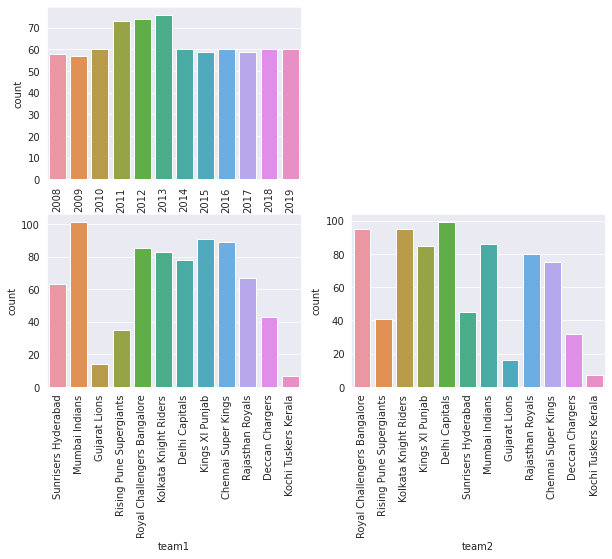

In [61]:
#Total counts of particular variable in countplot

plt.figure(figsize=(10,7))
plt.subplot(221)
sns.countplot(mat['season'])
plt.xticks(rotation=90)
plt.subplot(223)
sns.countplot(mat['team1'])
plt.xticks(rotation=90)
plt.subplot(224)
sns.countplot(mat['team2'])
plt.xticks(rotation=90)

#Graph showing plotting of number of matches played per season from 2008 to 2019
#Graph showing plotting of cumulative number of matches played by team 1
#Graph showing plotting of cumulative number of matched played by team 2

**Graph 2**

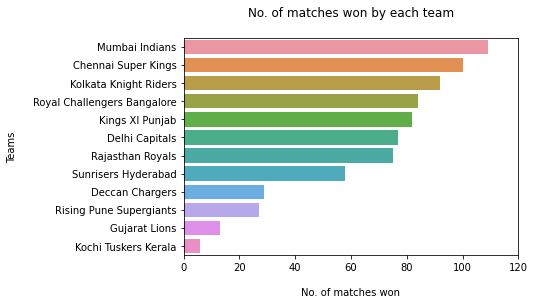

In [21]:
# The Bar Plot to visualise the total no. of matches won by each team

data=mat['winner'].value_counts()
fig, ax=plt.subplots()
ax.set_xlim([0,120])
sns.barplot(y=data.index, x=data, orient='h')
plt.title('No. of matches won by each team\n')
plt.xlabel("\nNo. of matches won")
plt.ylabel('Teams\n')
plt.show()

**Graph 3**

(array([26., 62.,  0., 10.,  0.,  1., 17.,  0.,  0.,  9.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

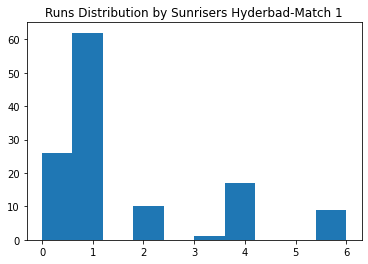

In [22]:
#Histogram that shows total singles, doubles, triples, fours and sixes scored by SRH in match 1.
delv1=delv.rename(columns={'match_id':'id'})
merged_df=mat.merge(delv1,on='id')
match1=merged_df[merged_df.id==1]
match1_srh=match1[match1.batting_team=='Sunrisers Hyderabad']
plt.title('Runs Distribution by Sunrisers Hyderbad-Match 1')
plt.hist(match1_srh.total_runs)

**Graph 4**

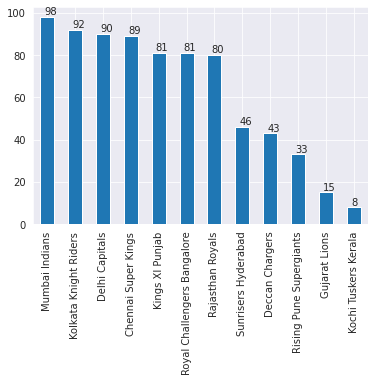

In [66]:
#The Bar Plot that shows the team that won the toss most number of times in descending order.
u=mat['toss_winner'].value_counts().plot.bar()
for l in u.patches:
    u.annotate(format(l.get_height()), (l.get_x()+0.15, l.get_height()+1))
plt.show()

**Graph 5**

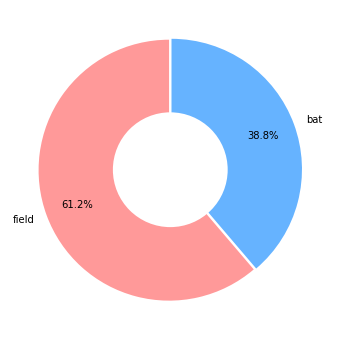

In [24]:
#The pie chart will show the decision of fielding or batting if a team wins the toss. 

plt.figure(figsize=(6,6))
sizes = mat.toss_decision.value_counts()
labels = mat.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.010,0.010))

#draw white circle
centre_circle = plt.Circle((0,0),0.44,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

**Graph 6**

Text(0, 0.5, 'Count')

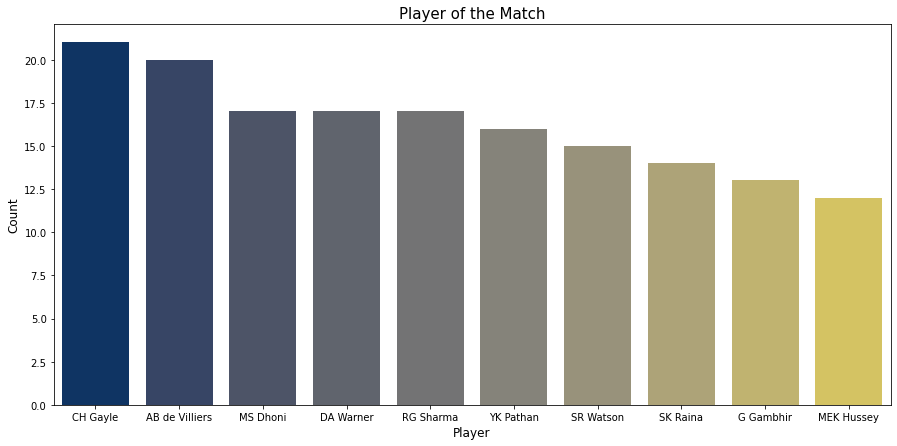

In [25]:
#The Bar Plot shows the top 10 players with highest Man of the Match Awards.

plt.figure(figsize=(15,7))
player_of_match=mat['player_of_match'].value_counts()[:10]
sns.barplot(player_of_match.index,
            player_of_match.values,
            palette='cividis')

plt.title("Player of the Match",fontsize=15)
plt.xlabel('Player',fontsize=12)
plt.ylabel('Count',fontsize=12)

**Graph 7**

Text(0, 0.5, '')

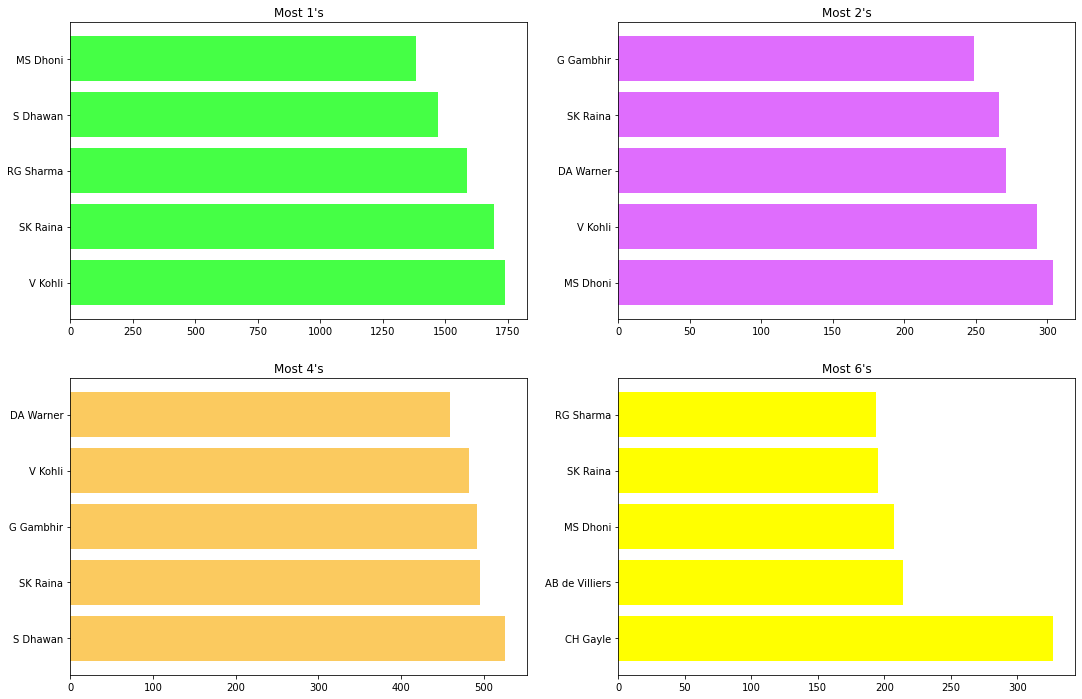

In [26]:
#Top 5 players with the highest singles, doubles, fours and sixes were plotted in sub plot.

toppers=delv.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
toppers=toppers.pivot('batsman','batsman_runs','total_runs')
fig,ax=plt.subplots(2,2,figsize=(18,12))
toppers[1].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,0],color='#45ff45',width=0.8)
ax[0,0].set_title("Most 1's")
ax[0,0].set_ylabel('')
toppers[2].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[0,1],color='#df6dfd',width=0.8)
ax[0,1].set_title("Most 2's")
ax[0,1].set_ylabel('')
toppers[4].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,0],color='#fbca5f',width=0.8)
ax[1,0].set_title("Most 4's")
ax[1,0].set_ylabel('')
toppers[6].sort_values(ascending=False)[:5].plot(kind='barh',ax=ax[1,1],color='#ffff00',width=0.8)
ax[1,1].set_title("Most 6's")
ax[1,1].set_ylabel('')

**Graph 8**

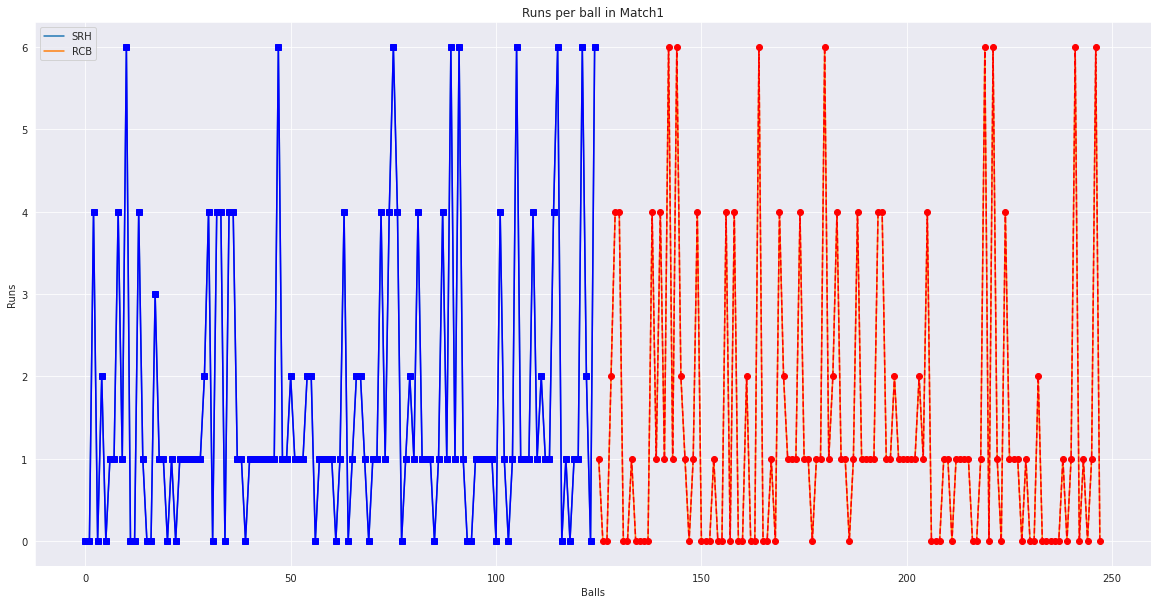

In [27]:
#The plotting of Line Chart shows the runs scored ball by ball in first match.
sns.set_style('darkgrid')
delv1=delv.rename(columns={'match_id':'id'})
merged_df=mat.merge(delv1,on='id')
match1=merged_df[merged_df.id==1]
match1_rcb=match1[match1.batting_team=='Royal Challengers Bangalore']
match1_srh=match1[match1.batting_team=='Sunrisers Hyderabad']
plt.figure(figsize=(20,10))
plt.plot(match1_srh.total_runs)
plt.plot(match1_rcb.total_runs)
plt.xlabel('Balls')
plt.ylabel('Runs')
plt.title('Runs per ball in Match1')
plt.legend(['SRH','RCB'])
plt.plot(match1_srh.total_runs, 's-b')
plt.plot(match1_rcb.total_runs, 'o--r')

**Statistical Analysis**

**Analysis 1**

In [44]:
#Maximum win by wickets

mat['win_by_wickets'].max()

10.0

In [29]:
#Details of the match in which the team won by the maximum wickets

mat.iloc[mat[mat['win_by_wickets'].ge(1)].win_by_wickets.idxmax()]  

id                                                      3
season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                            NaN
winner                              Kolkata Knight Riders
win_by_runs                                           NaN
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

Kolkata Knight Riders won the match by 10 wickets. 

**Analysis 2**

In [30]:
#Maximum win by runs

max(mat['win_by_runs'])

146.0

In [31]:
# Details of the Match in which the team won by the maximum margin of runs

mat.iloc[mat['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                      NaN
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                  NaN
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

Mumbai Indians won the match by 146 runs. 

**Analysis 3**

In [32]:
# Matches where D/L method was applied
# 1 indicates a rain curtailed match with D/L method being applied

mat['dl_applied'].value_counts()

1.0    19
Name: dl_applied, dtype: int64

In [33]:
# % of matches out of total matches with D/L method (1 for D/L method applied)

round(mat['dl_applied'].value_counts()/mat['id'].count()*100, 2)

1.0    2.51
Name: dl_applied, dtype: float64

**Analysis 4**

In [34]:
# Does winning the toss mean winning the match?

winnerwinner=mat['toss_winner']== mat['winner']
winnerwinner.groupby(winnerwinner).size()

False    363
True     393
dtype: int64

In [35]:
# % of games where the toss winning team lost the match (indicated by false) and toss winning team won the match(indicated by true)

round(winnerwinner.groupby(winnerwinner).size() / winnerwinner.count() * 100,2)

False    48.02
True     51.98
dtype: float64

**Analysis 5**

In [36]:
# Stadiums which have hosted D/L method applied matches 

mat.query('dl_applied==1')['venue']

56                                 M Chinnaswamy Stadium
99                                      Feroz Shah Kotla
102                                         Eden Gardens
119                                             Newlands
122                                            Kingsmead
148                                      SuperSport Park
251                                        Nehru Stadium
280                                         Eden Gardens
290                                M Chinnaswamy Stadium
488                                     Feroz Shah Kotla
536    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
567            Rajiv Gandhi International Stadium, Uppal
597            Rajiv Gandhi International Stadium, Uppal
620                                         Eden Gardens
624    Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
625                                M Chinnaswamy Stadium
641                               Sawai Mansingh Stadium
653                            

**Analysis 6**

In [37]:
#Average of win by runs of each team in all matches.

mat[mat['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.mean).sort_values(ascending = False)   

winner
Royal Challengers Bangalore    35.771429
Chennai Super Kings            34.192308
Rajasthan Royals               33.148148
Mumbai Indians                 32.736842
Kolkata Knight Riders          30.166667
Delhi Capitals                 27.392857
Kings XI Punjab                24.342105
Rising Pune Supergiants        24.230769
Sunrisers Hyderabad            23.766667
Deccan Chargers                23.388889
Kochi Tuskers Kerala           11.500000
Gujarat Lions                   1.000000
Name: win_by_runs, dtype: float64

**Analysis 7**

In [38]:
#Top 10 run scorers of IPL till 2019.
runs_scored=merged_df.groupby('batsman')[['batsman_runs']].sum()
x=runs_scored.sort_values('batsman_runs',ascending=False).head(10)
x

,batsman_runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


**Analysis 8**

In [39]:
#Orange cap winner each year with their total runs

orange=mat[['id','season']]
orange=orange.merge(delv,left_on='id',right_on='match_id',how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"])
orange.sort_values(by='season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


**Analysis 9**

In [40]:
#Total number of matches played by CSK till 2019
csk_matches1=mat[mat.team1=='Chennai Super Kings']
csk_matches2=mat[mat.team2=='Chennai Super Kings']
x=csk_matches1.shape[0]+csk_matches2.shape[0]
print('CSK have played {} matches till 2019.'.format(x))

CSK have played 164 matches till 2019.


**Analysis 10**

In [41]:
#Total number of runs scored in IPL till 2019.
x=merged_df['total_runs'].sum()
print('Total runs scored is {} runs till 2019.'.format(x))

Total runs scored is 235290 runs till 2019.
